In [3]:
import sys
# sys.path.append('C:/Users/jabuk/PycharmProjects/')
# sys.path.append('C:/Users/jabuk/PycharmProjects/numethods/')

import tools as t
% matplotlib inline
import IPython
import sys
from numpy.polynomial import polynomial as P

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math as m
import script as sc


In [4]:
def graph_values(dim, value, label='label'):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.grid(True)
    axes.set_title('Hodnota vlastního čísla')
    axes.set_xlabel(label)
    axes.set_ylabel('eigenvalue')
    for i in range(3):
        axes.plot(dim, value[i], label='$E_{}$'.format(i))
    axes.legend(loc=1)

def graph_time(dim, times):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.grid(True)
    axes.set_title('Časy výpočtu')
    axes.set_xlabel('k(=dim H)')
    axes.set_ylabel('t [s]')
    axes.plot(dim, times)

def graph_prec(dim, precision, label='label'):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.grid(True)
    axes.set_title('Přesnost')
    axes.set_xlabel(label)
    axes.set_ylabel('t [s]')
    axes.set_yscale('log')
    for i in range(3):
        axes.plot(dim[:-1], precision[i], label='$E_{}$'.format(i))
    axes.legend(loc=3)

def prec(x, value):
    precision = []
    for j in range(0, 3):
        precision.append([m.fabs(value[j][i] - value[j][i + 1]) for i in range(len(value[0]) - 1)])
    for i in range(3):
        mn = min(precision[i])
        index = precision[i].index(mn)

        print('E{} = {}'.format(i, value[i][index]))
        print('\t precision: {}'.format(precision[i][index]))
        print('\t for: {}'.format(x[index]))

    return precision


In [31]:
dim = []
value = [[], [], []]
times = []

#dvr = DVR(a=-3, b=5, N=3000)
#sorted(t.eigenLU(H, 500))[0:3]
#dim.extend([i for i in range(40, 80)])

#N=
# value[0].extend(
#     [-0.9408413270996653, -0.9408414004775921, -0.9408415149276522, -0.9408416754459705, -0.9408416874521875,
#      -0.9408417022824156, -0.8273149403442434, -0.9408417347211826, -0.827935958092347, -0.938623358556667,
#      -0.9408417416310947, -0.9408417248548793, -0.939131065182758, -0.9408282901709577, -0.940841742549788,
#      -0.9408417426175674, -0.9408417415689411, -0.9352333572630216, -0.939603883185008, -0.9408226732145853,
#      -0.9408417425862788, -0.9408417423154876, -0.9408417426441061, -0.9408417426429928, -0.9408417432909159,
#      -0.9408417426285447, -0.9408417433646883, -0.9408417426788361, -0.9408417428195573, -0.9408417426432074,
#      -0.9408417426423091, -0.9408417423834291, -0.9408417425506391, -0.9408417426527695, -0.9408417426376346,
#      -0.9408417430967665, -0.9408417423853719, -0.9408417425740763, -0.9408417093893526, -0.940841742193855])
# value[1].extend(
#     [-0.8279266488011556, -0.8279327192760786, -0.8279327570449072, -0.8279261370701981, -0.8279354780415978,
#      -0.8279354811484577, -0.7025012300322381, -0.8279359573295711, -0.7222442977135729, -0.8279359541974631,
#      -0.8279360320246854, -0.8279360323888761, -0.8279360378776175, -0.8279360255449157, -0.7965610966521038,
#      -0.8250284397220368, -0.8279360439515383, -0.8279360440018143, -0.8279360440489063, -0.827936066041481,
#      -0.8279360441283616, -0.8279360373810846, -0.8279360441374836, -0.8279360436446205, -0.8279360449806362,
#      -0.8279360436899474, -0.8279360431383469, -0.8279360435341497, -0.8279360437937052, -0.8279360437583623,
#      -0.8279360438940939, -0.8279360440396205, -0.8279360441020349, -0.8279360441721586, -0.8279360441585311,
#      -0.8279360441976215, -0.8279360434982931, -0.8279360427405723, -0.8279360165774198, -0.8279360438603995])
# value[2].extend([-0.7221715576789377, -0.7222135584815429, -0.7222290027831858, -0.722229989942023, -0.7222391616292129,
#                  -0.7222418596459649, -0.6237569602257439, -0.7222438392660488, -0.6228793516164247, -0.722244344298276,
#                  -0.7170706941352153, -0.7211137984751398, -0.7222413863124663, -0.7222447501325819, -0.722244758904418,
#                  -0.7222447592031928, -0.722244764013123, -0.722244064091638, -0.7222447659041178, -0.7222306498328532,
#                  -0.7222304708055993, -0.7219267884295383, -0.717301254620738, -0.6985803004697446, -0.7119931469650312,
#                  -0.6237677762703563, -0.7081100501359269, -0.7222254507089023, -0.7223024932606359,
#                  -0.6237676305800346, -0.7222375886740552, -0.7222437139437344, -0.7221891622010645,
#                  -0.7222429914136984, -0.7221988521615765, -0.7222418591555091, -0.7222418069744786, -0.72222145897079,
#                  -0.7222446818464577, -0.7222329279948799])
# 
# times.extend([26.55496096611023, 24.780691862106323, 23.888055086135864, 25.39212918281555, 26.862189769744873,
#               28.22614026069641, 29.79127025604248, 31.43344235420227, 33.24573636054993, 34.877912521362305,
#               36.735214948654175, 39.27303981781006, 43.77725648880005, 50.80927538871765, 46.24801850318909,
#               56.1080584526062, 56.04601573944092, 55.41456389427185, 61.665865898132324, 69.00679779052734,
#               60.81952714920044, 62.08232569694519, 64.3991584777832, 67.71519994735718, 70.73348927497864,
#               72.04543781280518, 79.62136483192444, 78.79526829719543, 82.46486496925354, 85.27189183235168,
#               87.34635066986084, 95.98840999603271, 95.99053287506104, 104.14673566818237, 112.68586301803589,
#               108.46074414253235, 107.34163761138916, 117.00818109512329, 115.21125602722168, 121.46408605575562])


#dvr = DVR(a=-3, b=5, N=1000)
#sorted(t.eigenLU(H, 1500))[0:3]
dim.extend([i for i in range(10, 80)])

value[0].extend([-0.8524011064557592, -0.8665417648189548, -0.8958207327705151, -0.89719801356603, -0.909338492347777, -0.9202953731634392, -0.9203566596213225, -0.9282562373786891, -0.9314759724683351, -0.9322149051368716, -0.9362046538655475, -0.9368155999506074, -0.9377011773773132, -0.9392599545880064, -0.9393043993707897, -0.9398691815376233, -0.9403379469996332, -0.9403390358971246, -0.940583875948778, -0.9406936867706347, -0.940702027407708, -0.9407818626464607, -0.9408025941273096, -0.9408083336417675, -0.9408292593538798, -0.9408325914190024, -0.9408347252969932, -0.9408393722074668, -0.9408398597353571, -0.9408404200311379, -0.9408413271004965, -0.940841400477783, -0.9408415149282472, -0.9408416754459972, -0.9408416874520696, -0.9408417063759008, -0.9407972769829503, -0.9408417347230739, -0.9408378605150435, -0.9392944331924994])
value[1].extend([-0.5804431872875907, -0.5834549640752572, -0.6422216045771407, -0.6946857376832425, -0.6947048581997831, -0.7344461171806987, -0.756906265494335, -0.7591061800190287, -0.7840321255051569, -0.791040714106272, -0.7955503772054618, -0.8088388386238525, -0.8100173919691513, -0.8145825418934174, -0.8202080393908969, -0.8202229144317957, -0.8232399862450468, -0.8250261730799636, -0.8251179428335909, -0.8265330416748486, -0.8269416837232059, -0.8270780420925155, -0.8275724020941392, -0.8276384958914561, -0.8277167013872445, -0.8278519786378027, -0.8278594939369481, -0.8278878018873601, -0.8279184627352764, -0.8279190669131743, -0.8279266488014576, -0.8279327192759, -0.8279327570453019, -0.827460281625216, -0.8279354780415403, -0.8279354811492765, -0.7222421251789697, -0.8279359573296164, -0.8279359580925569, -0.8279360023608221])
value[2].extend([-0.3130674924503551, -0.3543761267253301, -0.381320537256009, -0.4643425527626352, -0.4918540747217381, -0.5124098053887648, -0.5712297997892439, -0.5833053672060179, -0.6023571024571357, -0.6397153895391804, -0.642632430599829, -0.6597778301025155, -0.6801232257029963, -0.6801934234256909, -0.6934326045200554, -0.7021650792664844, -0.7025961987555569, -0.7107825453765627, -0.7134302688296332, -0.714456367882719, -0.7183295926766886, -0.7188161105946753, -0.719697291892692, -0.721073048165958, -0.7211109957420891, -0.7215577366273032, -0.7219313034333609, -0.7219313036207692, -0.7220881884617075, -0.722169915056046, -0.7221715577044409, -0.7222135584814844, -0.722229002782574, -0.7222299900804441, -0.7222391616285644, -0.7222418596461847, -0.6237569604075938, -0.7222438391731592, -0.7222442977137628, -0.7222443442910564])

times.extend([0.5790314674377441, 0.7373473644256592, 0.9222123622894287, 1.424069881439209, 1.3136041164398193, 1.5940895080566406, 1.891399621963501, 2.310961961746216, 2.480767011642456, 2.83400821685791, 3.2406272888183594, 3.624631643295288, 4.2254486083984375, 4.5608203411102295, 5.134786128997803, 5.659052610397339, 7.082200288772583, 7.450879096984863, 7.641716480255127, 8.360545873641968, 9.156383514404297, 10.01269245147705, 10.827401399612427, 11.762473821640015, 12.689656257629395, 13.876378059387207, 14.827548265457153, 15.967206716537476, 17.272465467453003, 18.478930473327637, 19.634547472000122, 21.267716884613037, 22.820570707321167, 24.235695838928223, 25.503189086914062, 27.326833248138428, 28.50186324119568, 30.239614963531494, 32.20559883117676, 34.369492053985596])

#50, 80
value[0].extend([-0.9408417416313843, -0.9408417419029372, -0.940841742441401, -0.827936042573522, -0.9408417425488292,
                 -0.9408417426121016, -0.9408417426300004, -0.9408417426382185, -0.9408136455568044,
                 -0.9407102531655983, -0.9354842146536118, -0.940841672033751, -0.9408417375875162, -0.9408417425900849,
                 -0.9408417426280175, -0.9408417426434168, -0.9408417411666982, -0.9408417426243969, -0.940841742526725,
                 -0.9408417426435497, -0.9408417426413139, -0.9408417426403738, -0.9408417426456548,
                 -0.9408417426424863, -0.9408417398621107, -0.940841742471387, -0.9408417419583907, -0.9408416336500456,
                 -0.9408417173252921, -0.9408417318022776])
value[1].extend(
    [-0.8279360317078178, -0.8279360323855595, -0.8279360381016199, -0.7222447459672109, -0.8279347545415919,
     -0.8279249823699896, -0.8279358879722971, -0.8279360439983813, -0.8279360440492123, -0.8279360441281733,
     -0.8279360441368423, -0.82793604414948, -0.8279360441486021, -0.827936044150651, -0.8279360441226165,
     -0.827936044156053, -0.8279360425497289, -0.8279360396447557, -0.8279360441428788, -0.827936044173599,
     -0.827936044152638, -0.8279360441667066, -0.82793604415324, -0.8279360442122554, -0.827936044147149,
     -0.8279360441277975, -0.8279360442967989, -0.8279360440399819, -0.8279360261085804, -0.8279360441364483])
value[2].extend(
    [-0.7222446231165653, -0.7221043059898198, -0.6773404271102923, -0.6237677332092231, -0.7222447589040382,
     -0.7222447591987929, -0.722244953550431, -0.7222447663342221, -0.722244766363331, -0.7222447668788625,
     -0.7222447671851379, -0.7222447677459395, -0.7222447672415813, -0.7222447672161807, -0.7222447673977016,
     -0.7222447651098122, -0.7222447664388514, -0.7222447672834509, -0.7222447672857056, -0.7222447672863829,
     -0.7222447672980018, -0.7222447672925735, -0.7222447672864334, -0.7222447673821023, -0.7222447672841886,
     -0.7222447672735957, -0.7222447674645974, -0.7222447665013029, -0.7222447539696972, -0.7222447672779726])

times.extend([44.110493659973145, 43.52077770233154, 40.555944204330444, 42.20414352416992, 44.323633670806885,
              46.414149045944214, 48.88990616798401, 51.23857021331787, 53.665326833724976, 57.51295566558838,
              63.75618076324463, 63.194117069244385, 66.48288059234619, 71.65758490562439, 73.22126841545105,
              75.0175473690033, 78.65316820144653, 81.00983738899231, 86.95332932472229, 89.03857016563416,
              92.46770000457764, 96.74820733070374, 100.8986554145813, 104.61759686470032, 109.38609409332275,
              114.91235280036926, 118.10556054115295, 123.07306981086731, 126.36174488067627, 131.92011523246765])


# Numerické metody, úkol č. 8

`Nalezněte energie prvních tří vázaných stavů diagonalizací matice Hkl vhodnou numerickou
metodou. Jaká je chyba vámi obdržených hodnot? Pokuste se to zjistit systematickou změnou
parametrů a, b, počtu kvadraturních bodů a počtu prvků báze (rozměr matice H). Výsledkem
úlohy budou tři čísla a odhad jejich chyby.`


# Výsledky

## Celkový výsledek
Pro   
>`k = 71
a = -3
b = 5
N = 500 (integrace)
n = 2000 (LU iterace)`

E1 = -0.9408417426425907  
* přesnost: 2.164490808809205e-12 

E2 = -0.8279360441592244    
* přesnost:  2.1788126858268697e-11  

E3 = -0.722220781898548    
* přesnost: 1.6321104968186617e-05  



## Přesnost v závislosti na rozměru matice H

_V této sekci se při výpočtu mění pouze rozměr matice H_

> `value = list` obsahuje pole s hodnotami dané energie pro různý rozměr matice H    
>`times = list` pole časů výpočtů

### Vývoj hodnoty vlastního čísla

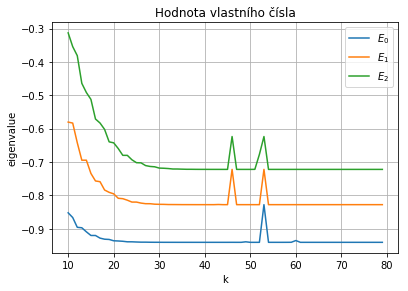

In [32]:
graph_values(dim, value, 'k')


### Časová náročnost výpočtu

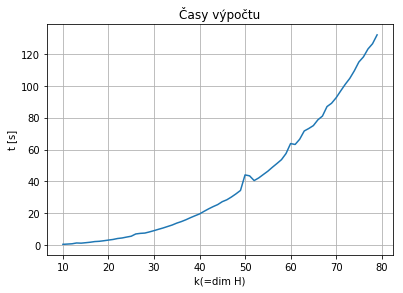

In [33]:
graph_time(dim, times)


### Přesnost

E0 = -0.9408417426413139
	 precision: 9.401368572525826e-13
	 for: 70
E1 = -0.82793604414948
	 precision: 8.778533455711113e-13
	 for: 61
E2 = -0.7222447672857056
	 precision: 6.772360450213455e-13
	 for: 68


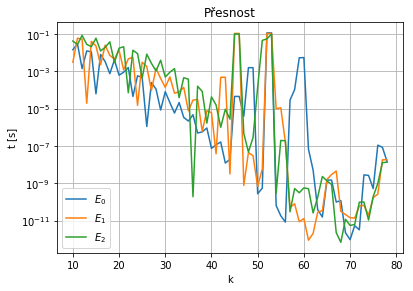

In [34]:
precision = prec(dim, value)
graph_prec(dim, precision, 'k')


In [36]:
#I1000, N1500

value_iv=[[], [], []]
times_iv=[]
dim_iv=[i/10 for i in range(-8,10)]
value_iv[0].extend([-0.8605307105649055, -0.9408417426480916, -0.9408417413810779, -0.9371963500795234, -0.8521939424914765, -0.7197753728409647, -0.6217578318111118, -0.5719852957850493, -0.5719852957850493, -0.6217578318111118, -0.7197753728409647, -0.8521939424914765, -0.9371963500795234, -0.9408417413810779, -0.9408417426480916, -0.8605307105649055, -0.9408417426413139, -0.9408417426651525])
value_iv[1].extend([-0.827936044090679, -0.8278934168666295, -0.827936030000204, -0.8155671497647027, -0.6919786279543038, -0.4241016046738168, -0.454725221466053, -0.37541845138113095, -0.37541845138113095, -0.454725221466053, -0.4241016046738168, -0.6919786279543038, -0.8155671497647027, -0.827936030000204, -0.8278934168666295, -0.827936044090679, -0.827936044152638, -0.8279360440563653])
value_iv[2].extend([-0.7222444299069024, -0.7222447672895865, -0.722244685923054, -0.6987973109144966, -0.5583515423607487, -0.29805275301105927, -0.27600019789659613, -0.09967231843086671, -0.09967231843086671, -0.27600019789659613, -0.29805275301105927, -0.5583515423607487, -0.6987973109144966, -0.722244685923054, -0.7222447672895865, -0.7222444299069024, -0.7222447672980018, -0.7222447654093923])

times_iv.extend([97.7456169128418, 91.73226761817932, 92.38682079315186, 92.32617378234863, 90.93905782699585, 92.08844423294067, 92.76531267166138, 92.31549501419067, 92.6304349899292, 93.61703610420227, 92.68999361991882, 91.85058903694153, 93.02750253677368, 92.74336123466492, 92.60644674301147, 92.15379738807678, 93.17780256271362, 92.71820759773254])


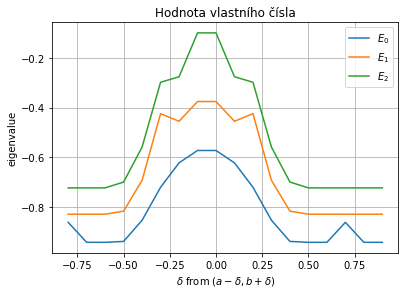

In [37]:
graph_values(dim_iv, value_iv, '$\delta$ from $(a-\delta, b+\delta)$')

E0 = -0.5719852957850493
	 precision: 0.0
	 for: -0.1
E1 = -0.37541845138113095
	 precision: 0.0
	 for: -0.1
E2 = -0.09967231843086671
	 precision: 0.0
	 for: -0.1


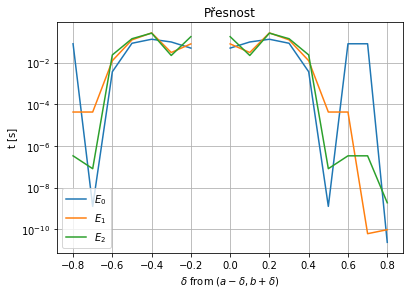

In [38]:
precision_iv=prec(dim_iv, value_iv, )
graph_prec(dim_iv, precision_iv, '$\delta$ from $(a-\delta, b+\delta)$') 

In [41]:
#dvr = DVR(a=-3, b=5, N=500)
# dim = 70
value_ig=[[], [], []]
times_ig=[]
dim_ig=[i+500 for i in range(0, 1000, 100)]

value_ig[0].extend([-0.9408417426375364, -0.94084174264607, -0.9408417426000442, -0.9408417426364838, -0.9408417426444614, -0.9408417426165014, -0.9408417426590167, -0.9408417426427687, -0.9408417426313556, -0.9408417426465213])
value_ig[1].extend([-0.8279360441488298, -0.8279360441517013, -0.82793604415373, -0.8279360422788831, -0.8279360441515033, -0.827936044158227, -0.8279360441487369, -0.8279360441533163, -0.8279360441527226, -0.8279360441528849])
value_ig[2].extend([-0.7222447672824606, -0.7222447672891182, -0.7222447672971524, -0.7222447672830729, -0.7222447672863712, -0.7222447673117358, -0.7222447672883158, -0.722244767290272, -0.7222447672999937, -0.7222447673327843])

times_ig.extend([87.45011305809021, 90.91369080543518, 90.44505596160889, 100.03377962112427, 97.79205894470215, 103.42878317832947, 109.21314764022827, 116.84852957725525, 126.49104881286621, 136.43907070159912])


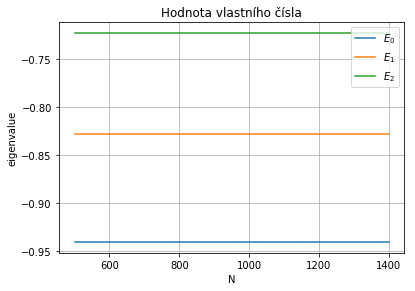

In [42]:
graph_values(dim_ig, value_ig, 'N')

E0 = -0.9408417426364838
	 precision: 7.977618565746525e-12
	 for: 800
E1 = -0.8279360441527226
	 precision: 1.6231460620019789e-13
	 for: 1300
E2 = -0.7222447672883158
	 precision: 1.956212969389526e-12
	 for: 1100


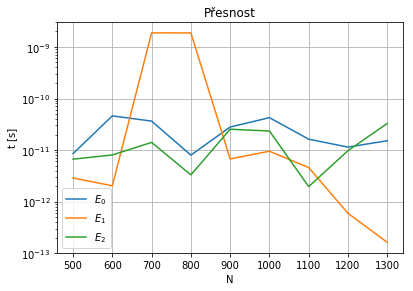

In [43]:
precision_ig=prec(dim_ig, value_ig, )
graph_prec(dim_ig, precision_ig, 'N') 